# Nomogram to predict the risk of acute kidney injury in patients with diabetic ketoacidosis: an analysis of the MIMIC-III database

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\Namrata Patil\Desktop\BANA 650 Healthcare Analytics\Project\Final_population_combined_CR_values.csv")
df.head()

,subject_id,hadm_id,icustay_id,gender,age,ethnicity,weight,height,dm_type,complications,...,saps_ii,oasis,sofa,gcs_eyes,gcs_motor,gcs_verbal,infusion_volume,total_urine_output,creatinine_48hrs,creatinine_7days
0,6321,171988,244279,M,31,BLACK/AFRICAN AMERICAN,NaN,NaN,T1DM,NaN,...,6,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5772,133327,225689,F,57,WHITE,NaN,163.576,T1DM,NaN,...,13,17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11242,116244,262657,F,39,UNKNOWN/NOT SPECIFIED,NaN,160.020,T1DM,NaN,...,6,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3084,152571,206423,F,50,WHITE,NaN,NaN,Unknown,NaN,...,13,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20312,189515,298077,M,62,BLACK/AFRICAN AMERICAN,NaN,177.800,T2DM,NaN,...,18,17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Processing and EDA 

### Heatmap for null values

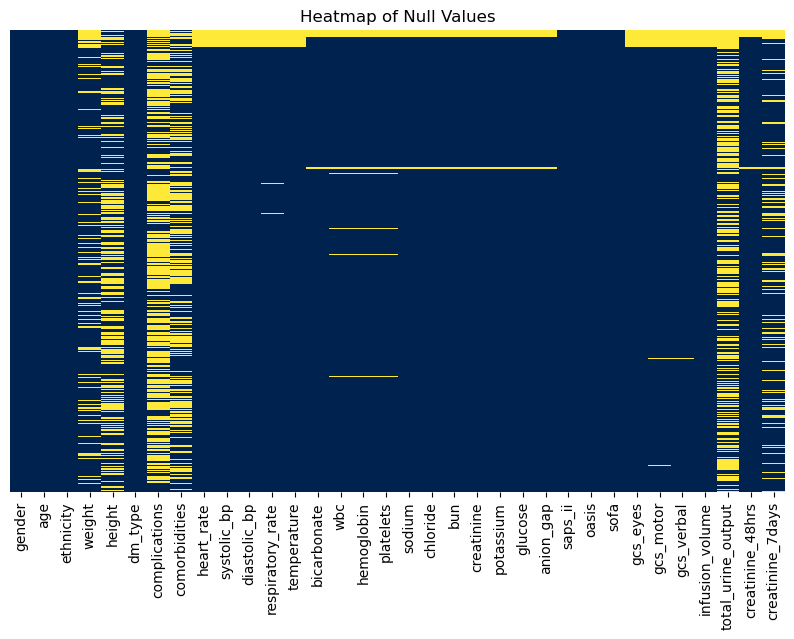

In [6]:
# Drop the specified columns
df_heat = df.drop(['icustay_id', 'subject_id', 'hadm_id'], axis=1)

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap of null values for the remaining columns
sns.heatmap(df_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)

# Add title
plt.title("Heatmap of Null Values")
plt.show()

In [7]:
des = df.drop(['icustay_id', 'subject_id', 'hadm_id'], axis=1)
des.describe()

,age,weight,height,heart_rate,systolic_bp,diastolic_bp,respiratory_rate,temperature,bicarbonate,wbc,...,saps_ii,oasis,sofa,gcs_eyes,gcs_motor,gcs_verbal,infusion_volume,total_urine_output,creatinine_48hrs,creatinine_7days
count,822.000000,673.000000,475.000000,794.000000,793.000000,793.000000,789.000000,793.000000,807.000000,798.000000,...,822.000000,822.000000,822.000000,791.000000,788.000000,792.000000,7.940000e+02,419.000000,807.000000,657.000000
mean,48.931873,75.278559,168.199789,91.808749,124.197714,63.881805,18.920311,36.859692,14.050805,11.029323,...,28.843066,26.531630,3.032847,3.508217,5.703046,4.349747,2.121986e+04,6348.460621,1.326394,1.345205
std,31.296939,21.010385,11.348762,14.652240,18.432651,11.461513,3.890988,0.517969,5.896430,5.024656,...,12.036119,7.585379,2.437555,0.834157,0.954167,1.453937,5.031819e+04,9462.597322,1.466740,1.540375
min,15.000000,23.900000,147.320000,54.285714,76.250000,37.137931,8.541667,34.277778,2.000000,0.500000,...,6.000000,10.000000,0.000000,1.000000,1.000000,0.000000,2.400000e+01,0.000000,0.200000,0.200000
25%,34.000000,61.700000,160.020000,81.109307,110.730769,55.916667,16.200000,36.566667,9.000000,7.625000,...,20.000000,21.000000,1.000000,3.000000,6.000000,5.000000,6.431126e+03,2240.000000,0.600000,0.600000
50%,46.000000,72.800000,167.640000,91.110000,121.000000,63.320000,18.250000,36.851852,14.000000,10.200000,...,27.000000,25.000000,2.000000,4.000000,6.000000,5.000000,1.072167e+04,4290.000000,0.800000,0.800000
75%,58.000000,84.000000,176.118345,102.458654,135.947368,70.583333,20.865854,37.145834,18.000000,13.500000,...,36.000000,31.000000,4.000000,4.000000,6.000000,5.000000,1.869373e+04,7180.000000,1.200000,1.200000
max,306.000000,190.330000,205.740000,139.480000,195.343750,107.160000,34.740741,39.388889,35.000000,40.700000,...,81.000000,60.000000,21.000000,4.000000,6.000000,5.000000,1.018065e+06,143781.000000,11.200000,11.000000


In [8]:
df.dtypes

subject_id              int64
hadm_id                 int64
icustay_id              int64
gender                 object
age                     int64
ethnicity              object
weight                float64
height                float64
dm_type                object
complications          object
comorbidities          object
heart_rate            float64
systolic_bp           float64
diastolic_bp          float64
respiratory_rate      float64
temperature           float64
bicarbonate           float64
wbc                   float64
hemoglobin            float64
platelets             float64
sodium                float64
chloride              float64
bun                   float64
creatinine            float64
potassium             float64
glucose               float64
anion_gap             float64
saps_ii                 int64
oasis                   int64
sofa                    int64
gcs_eyes              float64
gcs_motor             float64
gcs_verbal            float64
infusion_v

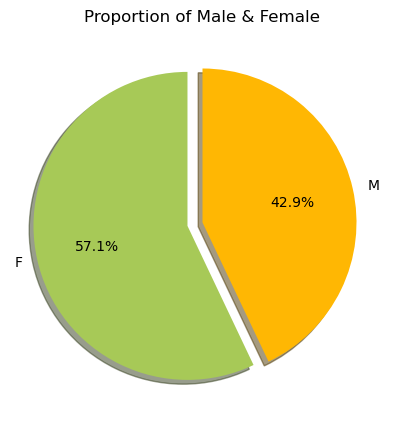

In [9]:
names = df['gender'].value_counts().index.tolist()
names
values = df['gender'].value_counts().tolist()
values
colors = [ '#a7c957', '#ffb703']
explode = (0.1, 0)

fig = plt.figure(figsize=(5, 5))
plt.pie(values, labels=names, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)
plt.title('Proportion of Male & Female')
plt.show()

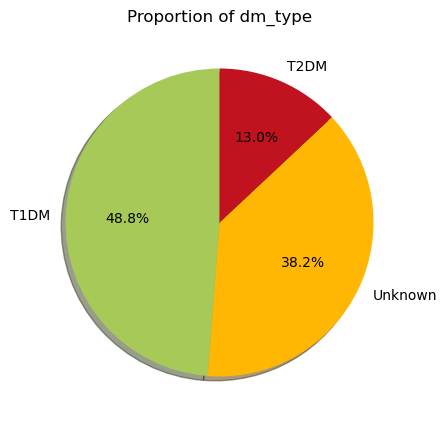

In [10]:
names = df['dm_type'].value_counts().index.tolist()
names
values = df['dm_type'].value_counts().tolist()
values
colors = [ '#a7c957', '#ffb703','#c1121f']
# explode = (0.1, 0)

fig = plt.figure(figsize=(5, 5))
plt.pie(values, labels=names, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Proportion of dm_type')
plt.show()

In [11]:
df['gcs_score'] = df['gcs_eyes'] * df['gcs_verbal'] * df['gcs_motor']

In [12]:
df = df.drop(['gcs_eyes','gcs_verbal','gcs_motor'],axis=1)

In [13]:
# The count of missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

subject_id              0
hadm_id                 0
icustay_id              0
gender                  0
age                     0
ethnicity               0
weight                149
height                347
dm_type                 0
complications         522
comorbidities         373
heart_rate             28
systolic_bp            29
diastolic_bp           29
respiratory_rate       33
temperature            29
bicarbonate            15
wbc                    24
hemoglobin             25
platelets              24
sodium                 15
chloride               15
bun                    15
creatinine             15
potassium              15
glucose                16
anion_gap              15
saps_ii                 0
oasis                   0
sofa                    0
infusion_volume        28
total_urine_output    403
creatinine_48hrs       15
creatinine_7days      165
gcs_score              37
dtype: int64


In [14]:
percent_missing = df.isnull().mean() * 100
print(percent_missing)

subject_id             0.000000
hadm_id                0.000000
icustay_id             0.000000
gender                 0.000000
age                    0.000000
ethnicity              0.000000
weight                18.126521
height                42.214112
dm_type                0.000000
complications         63.503650
comorbidities         45.377129
heart_rate             3.406326
systolic_bp            3.527981
diastolic_bp           3.527981
respiratory_rate       4.014599
temperature            3.527981
bicarbonate            1.824818
wbc                    2.919708
hemoglobin             3.041363
platelets              2.919708
sodium                 1.824818
chloride               1.824818
bun                    1.824818
creatinine             1.824818
potassium              1.824818
glucose                1.946472
anion_gap              1.824818
saps_ii                0.000000
oasis                  0.000000
sofa                   0.000000
infusion_volume        3.406326
total_ur

In [15]:
# Filter out columns with more than 22% missing values
columns_to_keep = percent_missing[percent_missing <= 22].index
df_filtered = df[columns_to_keep]

# Show the filtered DataFrame
print(df_filtered.head())

   subject_id  hadm_id  icustay_id gender  age               ethnicity  \
0        6321   171988      244279      M   31  BLACK/AFRICAN AMERICAN   
1        5772   133327      225689      F   57                   WHITE   
2       11242   116244      262657      F   39   UNKNOWN/NOT SPECIFIED   
3        3084   152571      206423      F   50                   WHITE   
4       20312   189515      298077      M   62  BLACK/AFRICAN AMERICAN   

   weight  dm_type  heart_rate  systolic_bp  ...  potassium  glucose  \
0     NaN     T1DM         NaN          NaN  ...        NaN      NaN   
1     NaN     T1DM         NaN          NaN  ...        NaN      NaN   
2     NaN     T1DM         NaN          NaN  ...        NaN      NaN   
3     NaN  Unknown         NaN          NaN  ...        NaN      NaN   
4     NaN     T2DM         NaN          NaN  ...        NaN      NaN   

   anion_gap  saps_ii  oasis  sofa  infusion_volume  creatinine_48hrs  \
0        NaN        6     14     0              N

In [16]:
# Check the remaining columns
print("Columns before filtering:", df.shape[1])
print("Columns after filtering:", df_filtered.shape[1])

Columns before filtering: 35
Columns after filtering: 31


In [17]:
missing_values = df_filtered.isnull().sum()
print(missing_values)

subject_id            0
hadm_id               0
icustay_id            0
gender                0
age                   0
ethnicity             0
weight              149
dm_type               0
heart_rate           28
systolic_bp          29
diastolic_bp         29
respiratory_rate     33
temperature          29
bicarbonate          15
wbc                  24
hemoglobin           25
platelets            24
sodium               15
chloride             15
bun                  15
creatinine           15
potassium            15
glucose              16
anion_gap            15
saps_ii               0
oasis                 0
sofa                  0
infusion_volume      28
creatinine_48hrs     15
creatinine_7days    165
gcs_score            37
dtype: int64


In [18]:
from sklearn.impute import KNNImputer

In [19]:
print(df_filtered.dtypes)

subject_id            int64
hadm_id               int64
icustay_id            int64
gender               object
age                   int64
ethnicity            object
weight              float64
dm_type              object
heart_rate          float64
systolic_bp         float64
diastolic_bp        float64
respiratory_rate    float64
temperature         float64
bicarbonate         float64
wbc                 float64
hemoglobin          float64
platelets           float64
sodium              float64
chloride            float64
bun                 float64
creatinine          float64
potassium           float64
glucose             float64
anion_gap           float64
saps_ii               int64
oasis                 int64
sofa                  int64
infusion_volume     float64
creatinine_48hrs    float64
creatinine_7days    float64
gcs_score           float64
dtype: object


In [20]:
# Separate numerical columns
numerical_columns = df_filtered.select_dtypes(include=['number']).columns.tolist()

# Separate categorical columns
categorical_columns = df_filtered.select_dtypes(exclude=['number']).columns.tolist()

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['subject_id', 'hadm_id', 'icustay_id', 'age', 'weight', 'heart_rate', 'systolic_bp', 'diastolic_bp', 'respiratory_rate', 'temperature', 'bicarbonate', 'wbc', 'hemoglobin', 'platelets', 'sodium', 'chloride', 'bun', 'creatinine', 'potassium', 'glucose', 'anion_gap', 'saps_ii', 'oasis', 'sofa', 'infusion_volume', 'creatinine_48hrs', 'creatinine_7days', 'gcs_score']
Categorical Columns: ['gender', 'ethnicity', 'dm_type']


In [21]:
from sklearn.impute import KNNImputer
import pandas as pd

# Ensure df_filtered is a true copy
df_filtered = df_filtered.copy()

# Initialize the KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Impute the columns with missing values
imputed_data = knn_imputer.fit_transform(df_filtered[numerical_columns])

# Replace the imputed data back into the DataFrame using .loc
df_filtered.loc[:, numerical_columns] = imputed_data

# Check for missing values after imputation
print("Missing Values After Imputation:\n", df_filtered.isnull().sum())

Missing Values After Imputation:
 subject_id          0
hadm_id             0
icustay_id          0
gender              0
age                 0
ethnicity           0
weight              0
dm_type             0
heart_rate          0
systolic_bp         0
diastolic_bp        0
respiratory_rate    0
temperature         0
bicarbonate         0
wbc                 0
hemoglobin          0
platelets           0
sodium              0
chloride            0
bun                 0
creatinine          0
potassium           0
glucose             0
anion_gap           0
saps_ii             0
oasis               0
sofa                0
infusion_volume     0
creatinine_48hrs    0
creatinine_7days    0
gcs_score           0
dtype: int64


In [22]:
# Assuming baseline_creatinine is the minimum value across all available data points
df_filtered['baseline_creatinine'] = df_filtered[['creatinine_48hrs', 'creatinine_7days']].min(axis=1)

# Initialize the target variable to 0
df_filtered['AKI_diagnosis'] = 0

# Apply the KDIGO criteria for AKI diagnosis
df_filtered['AKI_diagnosis'] = (
    (df_filtered['creatinine_48hrs'] - df_filtered['baseline_creatinine'] >= 0.3) |  # 48-hour rule
    (df_filtered['creatinine_7days'] >= 1.5 * df_filtered['baseline_creatinine'])   # 7-day rule
).astype(int)  # Convert boolean to integer (0 or 1)

# Check the results using the correct DataFrame
print("AKI Diagnosis Distribution:")
print(df_filtered['AKI_diagnosis'].value_counts())

# # Save the updated dataset with the target variable
# df_filtered.to_csv("final_population_with_aki.csv", index=False)

# # Display a few rows to verify
# print(df_filtered[['subject_id', 'hadm_id', 'icustay_id', 'baseline_creatinine', 'creatinine_48hrs', 'creatinine_7days', 'AKI_diagnosis']].head())


AKI Diagnosis Distribution:
AKI_diagnosis
0    614
1    208
Name: count, dtype: int64


In [23]:
print(df_filtered[['creatinine_48hrs', 'creatinine_7days','baseline_creatinine']].isnull().sum())

creatinine_48hrs       0
creatinine_7days       0
baseline_creatinine    0
dtype: int64


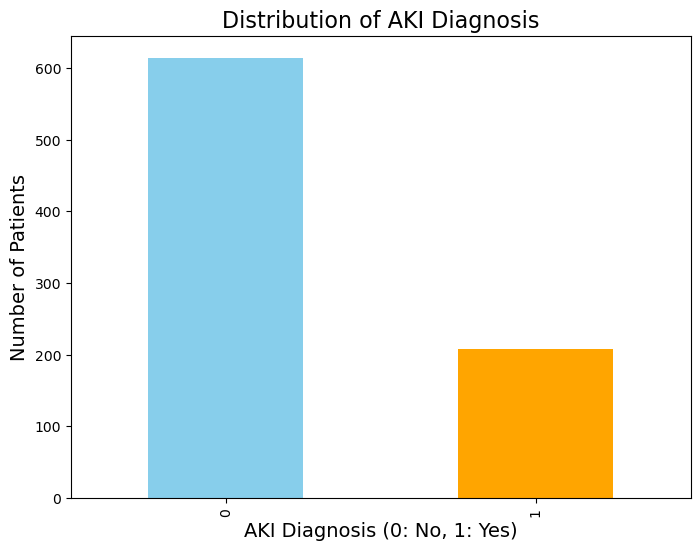

In [24]:
# Plot the distribution of AKI Diagnosis
df_filtered['AKI_diagnosis'].value_counts().plot(kind='bar', color=['skyblue', 'orange'], figsize=(8, 6))

# Add titles and labels
plt.title('Distribution of AKI Diagnosis', fontsize=16)
plt.xlabel('AKI Diagnosis (0: No, 1: Yes)', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)

# Show the plot
plt.show()

In [25]:
df_filtered.to_csv('HCA_EDA.csv',index=False)

In [26]:
data=df_filtered.copy()

In [27]:
# Assuming 'data' is your dataset and 'AKI_diagnosis' is the target column
X = data.drop(columns=['AKI_diagnosis'])  # Features
y = data['AKI_diagnosis']  # Target

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_columns)



Non-numeric columns: Index(['gender', 'ethnicity', 'dm_type'], dtype='object')


### One hot encoding

In [29]:
# Identify and encode non-numeric columns
non_numeric_columns = ['gender', 'ethnicity', 'dm_type'] 
X = pd.get_dummies(X, columns=non_numeric_columns, drop_first=False)

# Verify one-hot encoding
print("Columns after one-hot encoding:", X.columns)


Columns after one-hot encoding: Index(['subject_id', 'hadm_id', 'icustay_id', 'age', 'weight', 'heart_rate',
       'systolic_bp', 'diastolic_bp', 'respiratory_rate', 'temperature',
       'bicarbonate', 'wbc', 'hemoglobin', 'platelets', 'sodium', 'chloride',
       'bun', 'creatinine', 'potassium', 'glucose', 'anion_gap', 'saps_ii',
       'oasis', 'sofa', 'infusion_volume', 'creatinine_48hrs',
       'creatinine_7days', 'gcs_score', 'baseline_creatinine', 'gender_F',
       'gender_M', 'ethnicity_ASIAN', 'ethnicity_ASIAN - FILIPINO',
       'ethnicity_BLACK/AFRICAN', 'ethnicity_BLACK/AFRICAN AMERICAN',
       'ethnicity_BLACK/CAPE VERDEAN', 'ethnicity_BLACK/HAITIAN',
       'ethnicity_CARIBBEAN ISLAND', 'ethnicity_HISPANIC OR LATINO',
       'ethnicity_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)',
       'ethnicity_HISPANIC/LATINO - GUATEMALAN',
       'ethnicity_HISPANIC/LATINO - PUERTO RICAN',
       'ethnicity_HISPANIC/LATINO - SALVADORAN',
       'ethnicity_MULTI RACE ETHNICITY', 

### Split the data

In [31]:
from sklearn.model_selection import train_test_split
from collections import Counter

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check the class distribution
print("Training set class distribution:", Counter(y_train))
print("Validation set class distribution:", Counter(y_val))


Training set class distribution: Counter({0: 430, 1: 145})
Validation set class distribution: Counter({0: 184, 1: 63})


### Apply SMOTE to the training data

In [33]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution
print("Training set class distribution after SMOTE:", Counter(y_train_resampled))
print("Resampled training set shape:", X_train_resampled.shape)

# Convert resampled data to DataFrame (if not already)
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)

Training set class distribution after SMOTE: Counter({0: 430, 1: 430})
Resampled training set shape: (860, 54)


In [34]:
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({0: 430, 1: 145})
After SMOTE: Counter({0: 430, 1: 430})


### Lasso Regression

In [36]:
# Convert boolean columns to integers
X_train_resampled = X_train_resampled.astype(
    {col: 'int' for col in X_train_resampled.select_dtypes(include=['bool']).columns}
)

# Verify the updated data types
print("Updated data types in X_train_resampled:")
print(X_train_resampled.dtypes)

Updated data types in X_train_resampled:
subject_id                                                int64
hadm_id                                                   int64
icustay_id                                                int64
age                                                       int64
weight                                                  float64
heart_rate                                              float64
systolic_bp                                             float64
diastolic_bp                                            float64
respiratory_rate                                        float64
temperature                                             float64
bicarbonate                                             float64
wbc                                                     float64
hemoglobin                                              float64
platelets                                               float64
sodium                                                  float64

#### Compute and Remove High-VIF Predictors

In [38]:
# Check for constant features
constant_cols = X_train_resampled.columns[X_train_resampled.nunique() <= 1]
print("Constant or near-constant columns:", constant_cols)

# Drop constant features
X_train_resampled = X_train_resampled.drop(columns=constant_cols, errors='ignore')

Constant or near-constant columns: Index(['ethnicity_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)', 'ethnicity_WHITE - BRAZILIAN'], dtype='object')


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Add a constant term
X_vif = add_constant(X_train_resampled)

# Compute VIF
vif = pd.DataFrame({
    'Variable': X_vif.columns,
    'VIF': [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
print("VIF values:\n", vif)

# Filter out features with high VIF (e.g., VIF > 10)
high_vif_features = vif[vif['VIF'] > 10]['Variable'].tolist()
X_train_vif_filtered = X_train_resampled.drop(columns=high_vif_features, errors='ignore')

print("Filtered dataset shape after removing high-VIF features:", X_train_vif_filtered.shape)

VIF values:
                                     Variable          VIF
0                                      const  7730.493229
1                                 subject_id     1.374881
2                                    hadm_id     1.182998
3                                 icustay_id     1.234027
4                                        age     1.872521
5                                     weight     1.337035
6                                 heart_rate     2.270591
7                                systolic_bp     2.657108
8                               diastolic_bp     2.814191
9                           respiratory_rate     1.738240
10                               temperature     1.629218
11                               bicarbonate     1.817900
12                                       wbc     1.276420
13                                hemoglobin     1.670993
14                                 platelets     1.386777
15                                    sodium     2.611449
1

#### Standardize the VIF-Filtered Features

In [41]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_vif_filtered)

# Convert the scaled data back to a DataFrame (optional, for easier handling)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_vif_filtered.columns)

#### Apply LASSO Regression (Feature Selection)

In [43]:
from sklearn.linear_model import LogisticRegression

# Apply LASSO regression
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000)
lasso.fit(X_train_scaled, y_train_resampled)

# Identify the selected features (non-zero coefficients)
selected_features_mask = lasso.coef_[0] != 0
selected_features = X_train_vif_filtered.columns[selected_features_mask]
print("Selected features from LASSO regression:", selected_features.tolist())

Selected features from LASSO regression: ['subject_id', 'icustay_id', 'age', 'weight', 'systolic_bp', 'diastolic_bp', 'respiratory_rate', 'temperature', 'bicarbonate', 'wbc', 'hemoglobin', 'platelets', 'sodium', 'chloride', 'bun', 'potassium', 'glucose', 'anion_gap', 'saps_ii', 'oasis', 'sofa', 'infusion_volume', 'creatinine_7days', 'gcs_score', 'gender_F', 'gender_M', 'ethnicity_ASIAN', 'ethnicity_ASIAN - FILIPINO', 'ethnicity_BLACK/AFRICAN AMERICAN', 'ethnicity_BLACK/HAITIAN', 'ethnicity_HISPANIC OR LATINO', 'ethnicity_HISPANIC/LATINO - GUATEMALAN', 'ethnicity_HISPANIC/LATINO - PUERTO RICAN', 'ethnicity_OTHER', 'ethnicity_UNABLE TO OBTAIN', 'ethnicity_UNKNOWN/NOT SPECIFIED', 'ethnicity_WHITE', 'ethnicity_WHITE - RUSSIAN', 'dm_type_T1DM', 'dm_type_T2DM', 'dm_type_Unknown']


#### Fit Logistic Regression with LASSO-Selected Features

In [45]:
from statsmodels.api import Logit

# Subset the data with LASSO-selected features
X_train_selected_lasso = X_train_vif_filtered[selected_features]

# Fit logistic regression with the selected features
logit_model = Logit(y_train_resampled, X_train_selected_lasso).fit()
print(logit_model.summary())

         Current function value: 0.322730
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          AKI_diagnosis   No. Observations:                  860
Model:                          Logit   Df Residuals:                      819
Method:                           MLE   Df Model:                           40
Date:                Sun, 01 Dec 2024   Pseudo R-squ.:                  0.5344
Time:                        13:21:33   Log-Likelihood:                -277.55
converged:                      False   LL-Null:                       -596.11
Covariance Type:            nonrobust   LLR p-value:                1.425e-108
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
subject_id                                1.666e-06   4.32e-06      0.386      0.700

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Filter Features by P<0.1

In [47]:
# Extract features with P < 0.1
significant_features = logit_model.pvalues[logit_model.pvalues < 0.1].index.tolist()
if 'const' in significant_features:  # Remove the constant term if present
    significant_features.remove('const')

print("Significant features (P < 0.1):", significant_features)

Significant features (P < 0.1): ['systolic_bp', 'temperature', 'wbc', 'bun', 'potassium', 'glucose', 'creatinine_7days', 'gcs_score', 'gender_F', 'gender_M', 'ethnicity_ASIAN', 'ethnicity_BLACK/AFRICAN AMERICAN', 'ethnicity_HISPANIC OR LATINO', 'ethnicity_HISPANIC/LATINO - GUATEMALAN', 'ethnicity_HISPANIC/LATINO - PUERTO RICAN', 'ethnicity_OTHER', 'ethnicity_UNABLE TO OBTAIN', 'ethnicity_UNKNOWN/NOT SPECIFIED', 'ethnicity_WHITE', 'dm_type_T1DM', 'dm_type_T2DM', 'dm_type_Unknown']


### Multivariate Logistic Regression

In [49]:
# Subset the data with significant features
X_train_significant = X_train_vif_filtered[significant_features]

# Fit logistic regression with the significant features
final_logit_model = Logit(y_train_resampled, X_train_significant).fit()
print(final_logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.341326
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          AKI_diagnosis   No. Observations:                  860
Model:                          Logit   Df Residuals:                      838
Method:                           MLE   Df Model:                           21
Date:                Sun, 01 Dec 2024   Pseudo R-squ.:                  0.5076
Time:                        13:21:33   Log-Likelihood:                -293.54
converged:                       True   LL-Null:                       -596.11
Covariance Type:            nonrobust   LLR p-value:                1.331e-114
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
systolic_bp                                 -0.

In [50]:
# Extract coefficients and intercept
coefficients = logit_model.params
print("Coefficients:\n", coefficients)

Coefficients:
 subject_id                                  1.665863e-06
icustay_id                                 -4.680176e-07
age                                        -4.337872e-03
weight                                      8.665979e-03
systolic_bp                                -1.573744e-02
diastolic_bp                               -2.100027e-02
respiratory_rate                            5.437242e-02
temperature                                -4.440067e-01
bicarbonate                                -1.864614e-02
wbc                                        -5.625360e-02
hemoglobin                                  1.076535e-01
platelets                                  -1.917198e-03
sodium                                     -2.532184e-02
chloride                                    2.691754e-02
bun                                         2.088062e-02
potassium                                   6.059858e-01
glucose                                     3.821257e-03
anion_gap       

### Nomogram

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Significant features and their coefficients
significant_features = {
    'systolic_bp': -0.0253,
    'temperature': -0.3510,
    'wbc': -0.0467,
    'bun': 0.0213,
    'potassium': 0.4621,
    'glucose': 0.0036,
    'creatinine_7days': 0.5156,
    'gcs_score': -0.0109,
    'gender_F': 5.0664,
    'gender_M': 4.8541,
    'ethnicity_ASIAN': 5.0683,
    'ethnicity_BLACK/AFRICAN AMERICAN': 3.7752,
    'ethnicity_HISPANIC OR LATINO': 3.4867,
    'ethnicity_HISPANIC/LATINO - GUATEMALAN': 5.4800,
    'ethnicity_HISPANIC/LATINO - PUERTO RICAN': 4.1799,
    'ethnicity_OTHER': 3.6922,
    'ethnicity_UNKNOWN/NOT SPECIFIED': 3.6776,
    'ethnicity_WHITE': 3.7170,
    'dm_type_T1DM': 4.7190,
    'dm_type_T2DM': 4.3101,
    'dm_type_Unknown': 4.5854,
}

# Convert coefficients to a DataFrame for easy handling
coef_df = pd.DataFrame.from_dict(significant_features, orient='index', columns=['Coefficient'])
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()

# Assign points based on scaling
max_points = 100
coef_df['Points'] = (coef_df['Absolute Coefficient'] / coef_df['Absolute Coefficient'].max()) * max_points

# Sort features for visualization
coef_df = coef_df.sort_values(by='Points', ascending=False)


In [53]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression

In [54]:
# Assuming X_train_scaled and y_train_resampled are ready
X, y = X_train_scaled, y_train_resampled

In [55]:
lasso_cv = LassoCV(alphas=None, cv=10, random_state=42, max_iter=10000)
lasso_cv.fit(X, y)

# Extract optimal lambda
optimal_lambda = lasso_cv.alpha_
print("Optimal Lambda (Regularization Parameter):", optimal_lambda)

Optimal Lambda (Regularization Parameter): 0.0034153968094012394


 #### Identify Significant Features

In [57]:
# Assuming logit_model is your fitted multivariate logistic regression model
significant_features = logit_model.pvalues[logit_model.pvalues < 0.1].index.tolist()
if 'const' in significant_features:  # Exclude the constant term if present
    significant_features.remove('const')

print("Significant features:", significant_features)

Significant features: ['systolic_bp', 'temperature', 'wbc', 'bun', 'potassium', 'glucose', 'creatinine_7days', 'gcs_score', 'gender_F', 'gender_M', 'ethnicity_ASIAN', 'ethnicity_BLACK/AFRICAN AMERICAN', 'ethnicity_HISPANIC OR LATINO', 'ethnicity_HISPANIC/LATINO - GUATEMALAN', 'ethnicity_HISPANIC/LATINO - PUERTO RICAN', 'ethnicity_OTHER', 'ethnicity_UNABLE TO OBTAIN', 'ethnicity_UNKNOWN/NOT SPECIFIED', 'ethnicity_WHITE', 'dm_type_T1DM', 'dm_type_T2DM', 'dm_type_Unknown']


#### Filter Data for Significant Features

In [59]:
# Subset X to include only significant features
X_significant = X_train_vif_filtered[significant_features]

#### Fit LASSO and Plot Coefficients for Significant Features

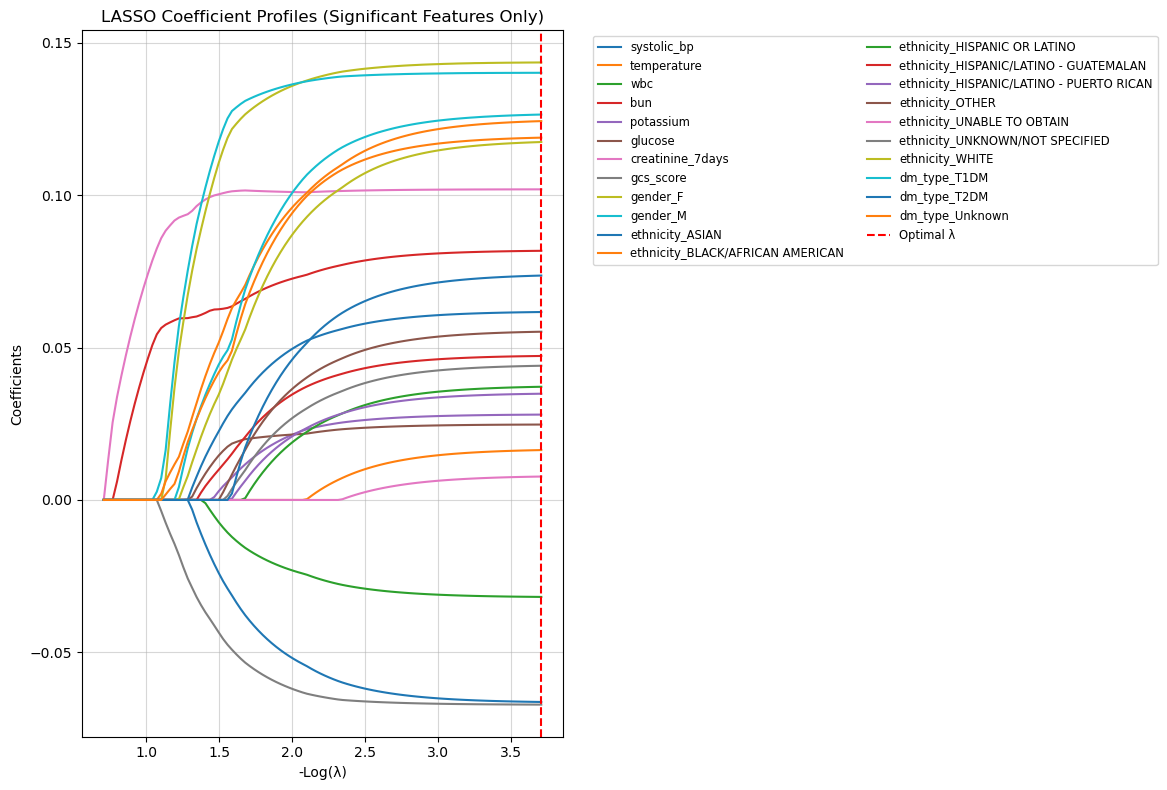

In [61]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Scale the data for significant features
scaler = StandardScaler()
X_significant_scaled = scaler.fit_transform(X_significant)

# Fit LASSO with Cross-Validation
lasso_cv = LassoCV(alphas=None, cv=10, random_state=42, max_iter=10000)
lasso_cv.fit(X_significant_scaled, y_train_resampled)

# Extract LASSO paths
alphas, coefs, _ = lasso_cv.path(X_significant_scaled, y_train_resampled, alphas=lasso_cv.alphas_)

# Plot Coefficient Profiles for Significant Features
plt.figure(figsize=(12,8))
for i, feature in enumerate(significant_features):
    plt.plot(-np.log10(alphas), coefs[i], label=feature)
plt.axvline(-np.log10(lasso_cv.alpha_), linestyle="--", color="red", label="Optimal λ")
plt.xlabel("-Log(λ)")
plt.ylabel("Coefficients")
plt.title("LASSO Coefficient Profiles (Significant Features Only)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

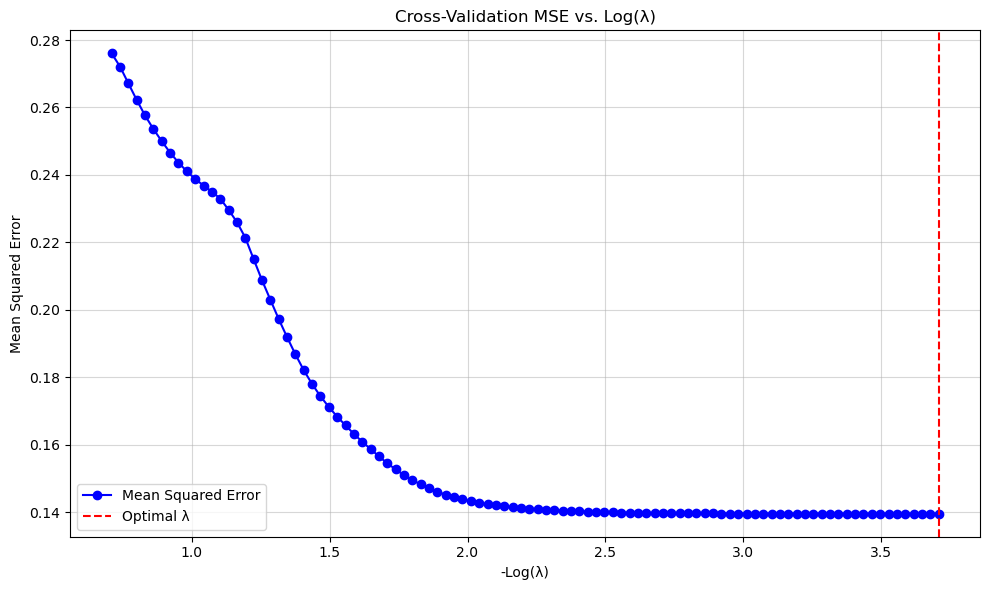

In [62]:
# Extract the mean squared errors and alphas (λ values) from LassoCV
mse_mean = np.mean(lasso_cv.mse_path_, axis=1)  # Mean MSE across folds
alphas = lasso_cv.alphas_  # Corresponding λ values

# Plot MSE vs. Log(λ)
plt.figure(figsize=(10, 6))
plt.plot(-np.log10(alphas), mse_mean, marker='o', label='Mean Squared Error', color='blue')
plt.axvline(-np.log10(lasso_cv.alpha_), linestyle="--", color="red", label="Optimal λ")
plt.xlabel("-Log(λ)")
plt.ylabel("Mean Squared Error")
plt.title("Cross-Validation MSE vs. Log(λ)")
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

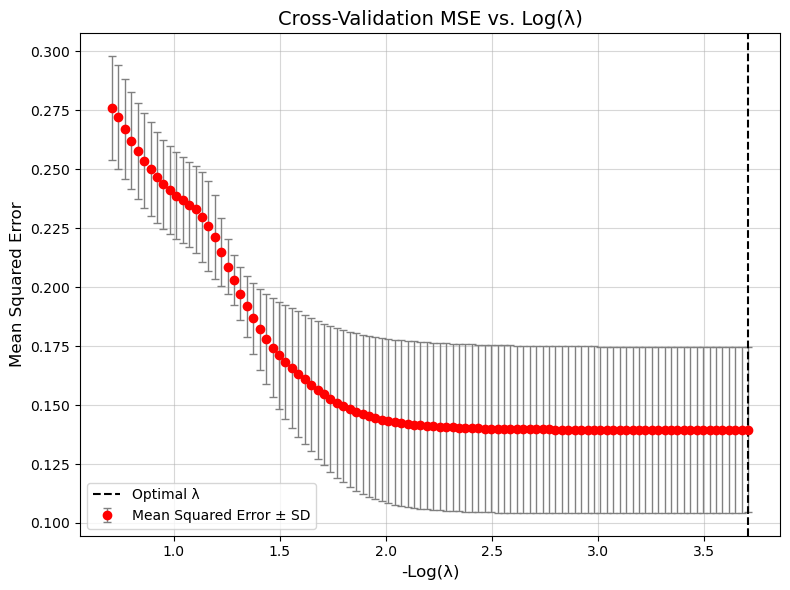

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the mean squared errors and standard deviations from LassoCV
mse_mean = np.mean(lasso_cv.mse_path_, axis=1)  # Mean MSE across folds
mse_std = np.std(lasso_cv.mse_path_, axis=1)    # Standard deviation of MSE across folds
alphas = lasso_cv.alphas_                       # Corresponding λ values

# Optimal lambda
optimal_lambda = lasso_cv.alpha_

# Plot MSE vs. Log(λ)
plt.figure(figsize=(8, 6))
plt.errorbar(-np.log10(alphas), mse_mean, yerr=mse_std, fmt='o', color='red', ecolor='gray', elinewidth=1, capsize=3, label='Mean Squared Error ± SD')

# Highlight the optimal lambda
plt.axvline(-np.log10(optimal_lambda), linestyle="--", color="black", label="Optimal λ")

# Axis labels and title
plt.xlabel("-Log(λ)", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.title("Cross-Validation MSE vs. Log(λ)", fontsize=14)

# Additional grid and legend
plt.grid(alpha=0.5)
plt.legend(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()